In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nhanes_2015_2016.csv')
df.head(10)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


# 1. Посчитать количество уникальных значений DMDEDUC2.

In [4]:
df['DMDEDUC2'].nunique()

6

# 2. Посчитать сколько пропущенных значений в DMDEDUC2.

In [5]:
df['DMDEDUC2'].isnull().sum()

261

# 3. Посчитать пропорции каждого уникального значения DMDEDUC2 в общем количестве.

In [19]:
data=df.groupby(['DMDEDUC2'])['SEQN'].nunique()/len(df['SEQN'])*100
data

DMDEDUC2
1.0    11.421099
2.0    11.211857
3.0    20.680035
4.0    28.265039
5.0    23.818657
9.0     0.052310
Name: SEQN, dtype: float64

# 4. Вывести статистические показатели BMXWT.

In [6]:
df['BMXWT'].describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

# 5. Построить гистограмму BMXWT. Описать.

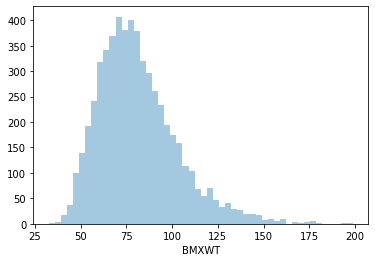

In [20]:
sb.distplot(df['BMXWT'], kde = False)

# 6. Построить гистограмму BPXSY1. Описать.

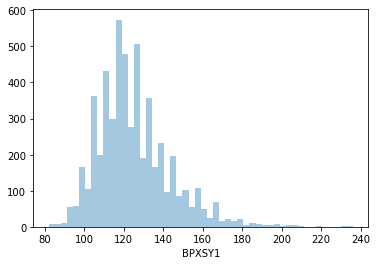

In [7]:
sb.distplot(df['BPXSY1'], kde = False)

# 7. Построить боксплот BPXSY1. Описать.

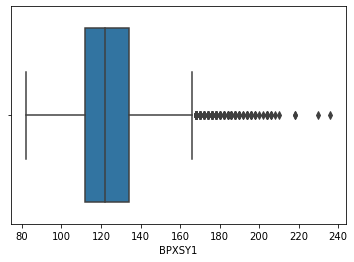

In [8]:
sb.boxplot(df['BPXSY1'])

# 8. Построить боксплот BPXSY1 для мужчин и женщин радом на одном рисунке. Описать разницу.

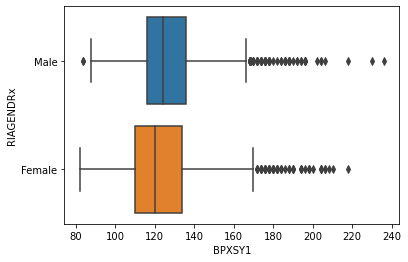

In [14]:
df['RIAGENDRx'] = df['RIAGENDR'].replace({1:'Male', 2:'Female'})
sb.boxplot(x=df['BPXSY1'], y=df['RIAGENDRx'])

# 9. Заменить DMDMARTL на слова.

In [11]:
df['DMDMARTL'].unique()

array([ 1.,  3.,  6.,  4.,  5., nan,  2., 77.])

In [12]:
df['marital_status']=df['DMDMARTL'].replace({1.: 'Married', 2.: 'Widowed', 3.: 'Divorced', 
                                            4.: 'Separated', 5.: 'Never married', 6.: 'Living with partner',
                                            77.: 'Refused'})
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,marital_status
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,Married
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Female,Living with partner
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Female,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Female,Widowed
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Male,Married
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Female,Widowed
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Male,Married


# 11. Построить scatterplot между BPXDI1 и BPXDI2. Построить матрицу корреляций. Описать.

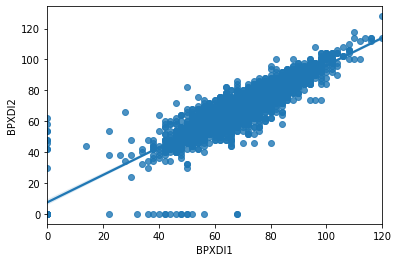

In [4]:
sb.regplot(x='BPXDI1', y='BPXDI2', data=df, fit_reg=True)

# 12. Постройте сетку scatterplots между BPXDI1 и BPXSY1 Разделите графики по полу (строки) и по группам расы / этнической принадлежности (столбцы).

In [16]:
df['Race'] = df['RIDRETH1'].replace({1:'Mexican American', 2:'Other Hispanic', 3:'White', 4:'Black', 5:'Other'})

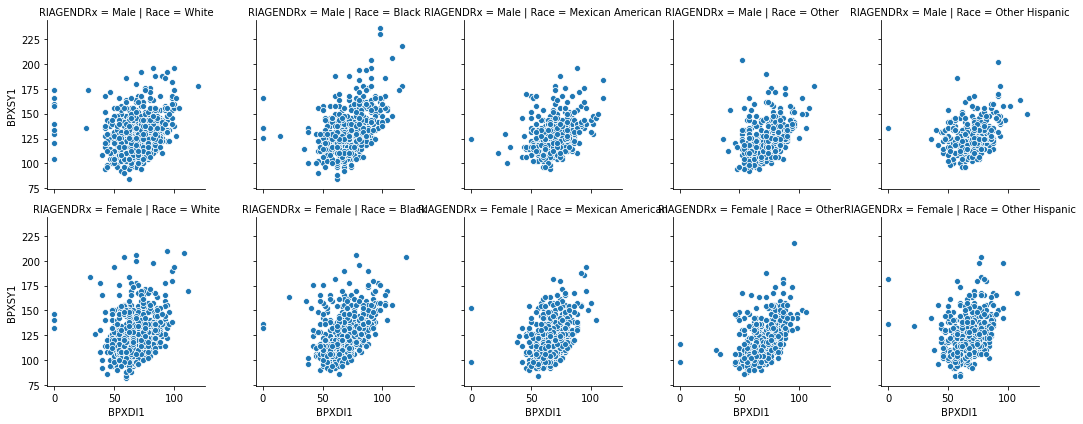

In [17]:
q=sb.FacetGrid(df, col='Race', row='RIAGENDRx')
q.map(sb.scatterplot, 'BPXDI1', 'BPXSY1')

# 13. Построить частотную таблицу между RIDRETH1 и HIQ210

In [5]:
dx=df.groupby('RIDRETH1')['HIQ210']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format='%.2f'))
# формально я выполнил это задание, но на деле я не понимаю, что здесь происходит

HIQ210    1.0  2.0  9.0
RIDRETH1               
1        0.14 0.86 0.00
2        0.13 0.87  NaN
3        0.07 0.93 0.00
4        0.11 0.89 0.00
5        0.08 0.92 0.00


# 15. Посмотреть на выборочный коэффициент корреляции между BPXSY1 и BPXDI1 у двух случайных выборок.

In [4]:
df.shape

(5735, 28)

In [9]:
df1=df.sample(n=100, replace=0)
df1.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
753,85022,1.0,NaN,3.0,2,1,61,3,1.0,4.0,...,132.0,66.0,80.4,170.6,27.6,39.4,38.2,35.6,97.6,2.0
1521,86308,2.0,2.0,NaN,2,2,22,2,1.0,2.0,...,108.0,72.0,66.7,146.4,31.1,35.8,33.0,29.2,102.3,2.0
974,85396,2.0,2.0,NaN,2,2,33,5,2.0,5.0,...,124.0,78.0,71.0,160.6,27.5,35.9,35.0,30.8,93.7,2.0
3811,90321,NaN,NaN,NaN,2,2,44,4,1.0,4.0,...,NaN,NaN,72.6,152.5,31.2,NaN,NaN,NaN,NaN,2.0
4037,90701,1.0,NaN,NaN,1,2,57,4,1.0,2.0,...,110.0,70.0,42.5,159.3,16.7,37.3,31.5,21.0,68.0,1.0


In [10]:
df2=df.sample(n=100, replace=0)
df2.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
3312,89442,1.0,NaN,NaN,1,1,51,5,2.0,2.0,...,136.0,94.0,71.2,177.9,22.5,40.6,38.2,30.7,86.1,2.0
3352,89519,1.0,NaN,NaN,1,1,65,1,2.0,3.0,...,128.0,64.0,69.9,164.3,25.9,36.0,35.0,30.8,93.1,NaN
4089,90808,1.0,NaN,2.0,2,2,48,3,1.0,4.0,...,106.0,72.0,54.3,155.0,22.6,35.7,32.5,26.9,78.0,2.0
5058,92524,2.0,1.0,NaN,1,2,54,1,1.0,3.0,...,142.0,78.0,62.2,154.2,26.2,34.2,31.2,28.3,87.3,1.0
4164,90938,1.0,NaN,6.0,1,1,55,3,1.0,2.0,...,120.0,64.0,103.8,170.4,35.7,39.7,38.4,38.5,129.0,2.0


In [11]:
df1['BPXSY1'].corr(df1['BPXDI1'])

0.3158769916136361

In [12]:
df2['BPXSY1'].corr(df2['BPXDI1'])

0.3995179492122008

# 16. Построить доверительный интервал для BPXSY1 у мужчин.

In [8]:
import statsmodels.api as sm
men=df[df['RIAGENDR']==1]
women=df[df['RIAGENDR']==2]
print('Доверительный интервал для мужчин составляет:', sm.stats.DescrStatsW(men['BPXSY1'].dropna()).zconfint_mean())
print('Доверительный интервал для женщин составляет:', sm.stats.DescrStatsW(women['BPXSY1'].dropna()).zconfint_mean())

Доверительный интервал для мужчин составляет: (126.32343518679691, 127.67427561060866)
Доверительный интервал для женщин составляет: (122.57112674395216, 123.98858548626367)


# 17. Проверить гипотезу о том, что BPXSY1 в среднем равен у мужчин и женщин.